<a href="https://colab.research.google.com/github/adag21044/PoliticalTweetAnalyzer/blob/main/PoliticalTweetAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
import re
import numpy as np
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [ ]:
# 1️⃣ **ÖRNEK POLİTİK VERİ SETİ**
tweets_data = {
    "authoritarian_left": [
        "The government must regulate businesses for fairness.",
        "We need higher taxes on the rich for wealth redistribution.",
        "Public healthcare is a human right, not a privilege.",
        "Strong government policies will protect the working class."
    ],
    "libertarian_left": [
        "People should be free to make their own life choices.",
        "The government should not interfere in personal matters.",
        "Decentralization of power is key to real freedom.",
        "We need a social safety net, but with personal choice."
    ],
    "authoritarian_right": [
        "Strong borders make a strong nation!",
        "Law and order must be strictly enforced.",
        "Traditional values should be the foundation of our society.",
        "Military strength is necessary for national security."
    ],
    "libertarian_right": [
        "The free market is the best path to economic growth.",
        "Less government regulation means more innovation.",
        "People should have full control over their private property.",
        "Taxation is theft! Government should be as small as possible."
    ]
}
test_tweets = [
    "We need higher taxes for the rich!",
    "Government control is too much, let people decide!",
    "America first! We must secure our borders."
]

In [ ]:
# 2️⃣ **METİN TEMİZLEME**
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", "", tweet)
    tweet = re.sub(r"@\w+|#", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    return tweet

for category in tweets_data:
    tweets_data[category] = [preprocess_tweet(tweet) for tweet in tweets_data[category]]

In [ ]:
# 3️⃣ **BERT Modeli ile Tweet Embeddingleri**
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base")
bert_model = AutoModel.from_pretrained("cardiffnlp/twitter-roberta-base")

In [ ]:
def get_bert_embedding(tweet):
    tokens = tokenizer(tweet, return_tensors="pt", padding=True, truncation=True, max_length=50)
    with torch.no_grad():
        outputs = bert_model(**tokens)
    return outputs.last_hidden_state[:, 0, :].numpy().flatten()

In [ ]:
X = []
y = []

political_labels = {
    "authoritarian_left": (-5, 5),   # Sol + Otoriter
    "libertarian_left": (-5, -5),    # Sol + Liberteryan
    "authoritarian_right": (5, 5),   # Sağ + Otoriter
    "libertarian_right": (5, -5)     # Sağ + Liberteryan
}

for category, tweets in tweets_data.items():
    for tweet in tweets:
        embedding = get_bert_embedding(preprocess_tweet(tweet))  # BERT ile embedding al
        X.append(embedding)  # X listesine ekle

        if category in political_labels:
            y.append(political_labels[category])  # Politik pusula koordinatlarını ekle

# Numpy dizilerine çevir
X = np.array(X)
y = np.array(y)

print("Shape of X:", X.shape)  # (num_samples, 768) olmalı
print("Shape of y:", y.shape)  # (num_samples, 2) olmalı


Shape of X: (16, 768)
Shape of y: (16, 2)


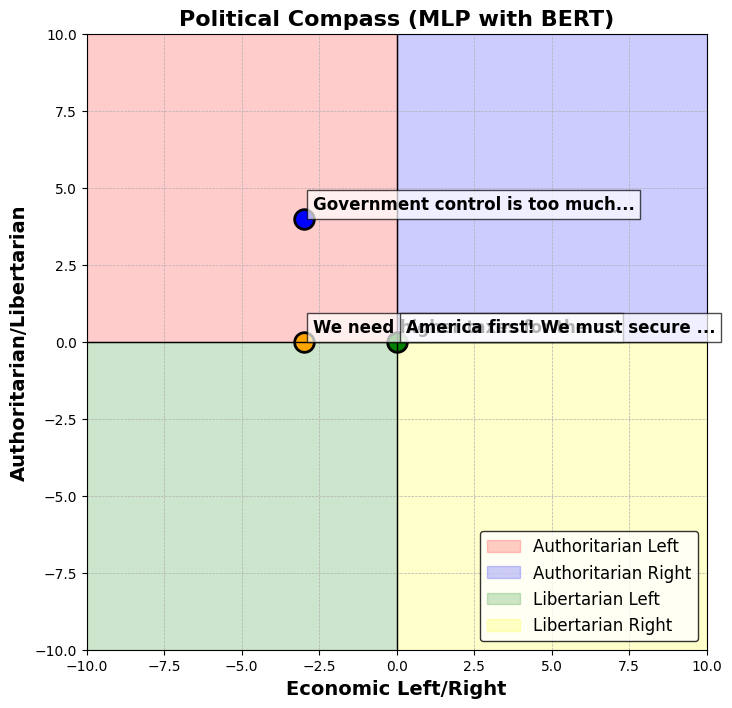

In [ ]:

# 📊 **Grafik Çizme - Politik Compass**
plt.figure(figsize=(8, 8))
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)
plt.fill_between([-10, 0], 0, 10, color="red", alpha=0.2, label="Authoritarian Left")
plt.fill_between([0, 10], 0, 10, color="blue", alpha=0.2, label="Authoritarian Right")
plt.fill_between([-10, 0], -10, 0, color="green", alpha=0.2, label="Libertarian Left")
plt.fill_between([0, 10], -10, 0, color="yellow", alpha=0.2, label="Libertarian Right")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("Economic Left/Right", fontsize=14, fontweight="bold")
plt.ylabel("Authoritarian/Libertarian", fontsize=14, fontweight="bold")
plt.title("Political Compass (MLP with BERT)", fontsize=16, fontweight="bold")

colors = ["orange", "blue", "green"]
for i, (tweet, (x, y)) in enumerate(zip(test_tweets, predicted_coordinates)):
    plt.scatter(x, y, s=200, color=colors[i % len(colors)], edgecolors="black", linewidth=2)
    plt.text(x + 0.3, y + 0.3, tweet[:30] + "...", fontsize=12, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

plt.legend(loc="lower right", fontsize=12, frameon=True, edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

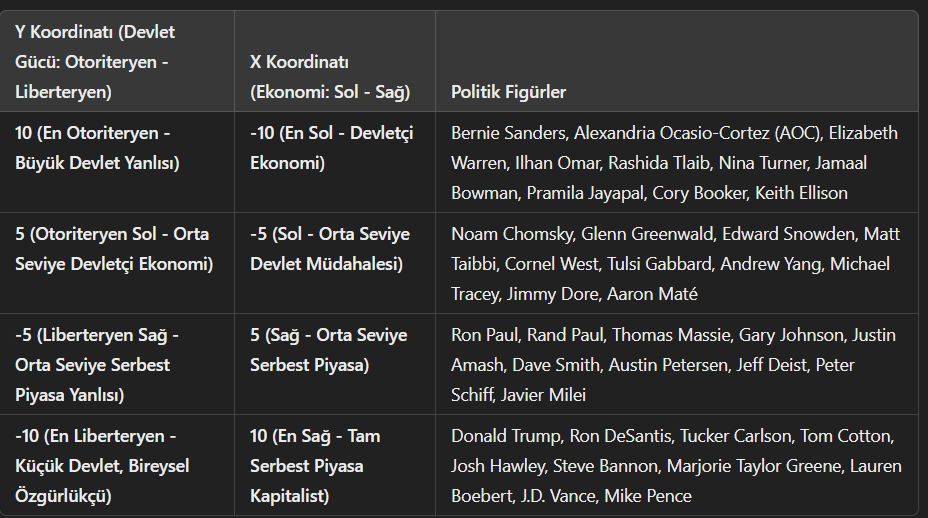

Trumps Tweets

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Trump'ın tweetlerini yükleme
file_path = "/content/trumptweets.csv"
# CSV dosyasını hatalı satırları atlayarak okuyalım
df = pd.read_csv(file_path, on_bad_lines="skip")

# İlk birkaç satırı tekrar kontrol edelim
df.head()


,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868.0,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273.0,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18.0,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24.0,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965.0,NaN,NaN,NaN


In [ ]:
import re
from sklearn.preprocessing import StandardScaler

# Tweet içeriklerini al
tweets = df["content"].dropna().tolist()

# Ön işleme: Özel karakterleri, linkleri ve mentionları (@user) kaldır
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Linkleri kaldır
    text = re.sub(r"@\w+", "", text)  # Mentionları kaldır
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Özel karakterleri kaldır
    text = text.lower().strip()  # Küçük harfe çevir ve boşlukları temizle
    return text

cleaned_tweets = [clean_text(tweet) for tweet in tweets]

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X = vectorizer.fit_transform(cleaned_tweets)

# Boyut indirgeme (Trump'ın tweetlerini tek bir vektöre indirgemek için)
svd = TruncatedSVD(n_components=1)
X_reduced = svd.fit_transform(X.T)  # Transpoz alıp kelimeler bazında indiriyoruz

# Standardize edip normalize edelim
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_reduced)

# Trump'ın koordinat noktası (10,10)
trump_data = {"politician": "Donald Trump", "x": 10, "y": 10, "vector": X_normalized.flatten()}

# Sonuçları inceleyelim
trump_data


{'politician': 'Donald Trump',
 'x': 10,
 'y': 10,
 'vector': array([-3.03765518e-01, -2.90193398e-01, -1.98018383e-01, -1.71019929e-01,
        -2.43376253e-01,  1.43193196e-01, -3.00339957e-01,  3.03721677e-01,
        -3.24289187e-01,  1.86258797e+00,  2.92361538e-01, -1.47931454e-01,
        -3.19127613e-01,  1.10385528e-01,  1.49722545e-01, -2.07251108e-01,
        -2.94037587e-01, -3.09765262e-01, -2.78706376e-01, -2.43117113e-01,
         7.74809574e-02,  3.99187979e-02, -2.86580273e-01, -2.36211470e-01,
        -3.29772218e-01,  5.10253905e-02, -3.54906704e-02,  9.40414305e-01,
         2.30711305e-01,  5.74129388e-01, -2.65026229e-01, -2.77615157e-01,
        -3.35599091e-01, -2.26844018e-01,  4.52631617e-02,  3.86270373e-03,
        -2.86281818e-01, -1.79101336e-01, -2.63047253e-01, -1.59805626e-01,
        -3.05144432e-01, -1.92100687e-01,  1.24181638e-01, -2.95278085e-01,
        -2.23426624e-01, -3.12824949e-01, -9.94387411e-03, -1.50437835e-01,
        -2.28955136e-01, -2

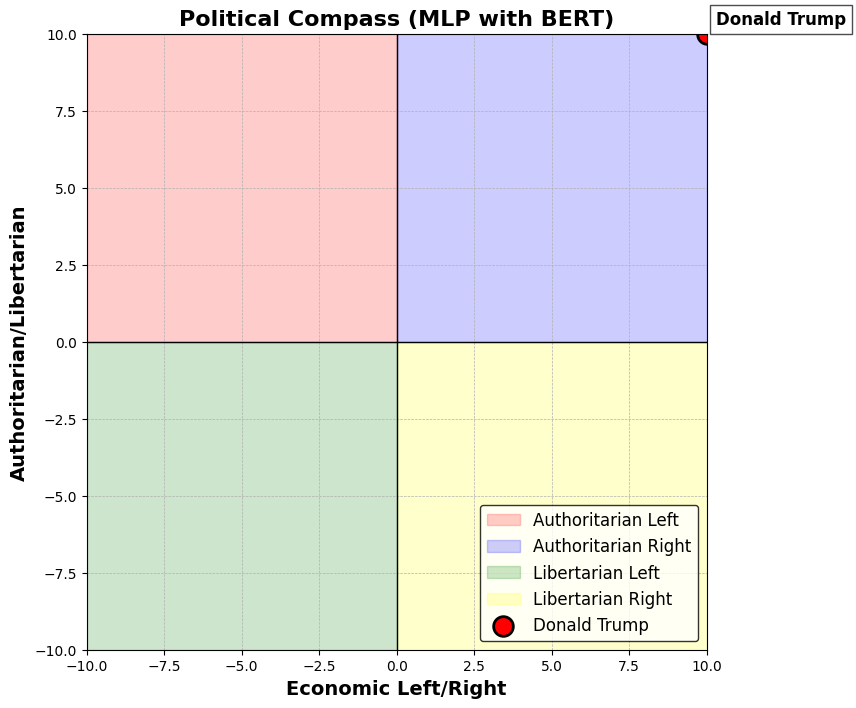

In [ ]:
# Önce tekrar fonksiyonumuzu tanımlayalım
def process_politician_tweets(df, name, x, y):
    """
    Belirli bir politik figürün tweetlerini temizleyip TF-IDF ile vektörleştirir
    ve belirtilen (x,y) koordinatına yerleştirir.
    """
    tweets = df["content"].dropna().tolist()
    cleaned_tweets = [clean_text(tweet) for tweet in tweets]

    # TF-IDF vektörleştirme
    X = vectorizer.fit_transform(cleaned_tweets)

    # Boyut indirgeme (Trump'ın tweetlerini tek bir vektöre indirgemek için)
    X_reduced = svd.fit_transform(X.T)  # Transpoz alıp kelimeler bazında indiriyoruz

    # Standardize edip normalize edelim
    X_normalized = scaler.fit_transform(X_reduced)

    return {"politician": name, "x": x, "y": y, "vector": X_normalized.flatten()}

# Trump'ın tweetlerini tekrar işleyelim ve vektörünü oluşturalım
trump_vector = process_politician_tweets(df, "Donald Trump", 10, 10)

# 📊 **Grafik Çizme - Politik Compass**
plt.figure(figsize=(8, 8))
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)
plt.fill_between([-10, 0], 0, 10, color="red", alpha=0.2, label="Authoritarian Left")
plt.fill_between([0, 10], 0, 10, color="blue", alpha=0.2, label="Authoritarian Right")
plt.fill_between([-10, 0], -10, 0, color="green", alpha=0.2, label="Libertarian Left")
plt.fill_between([0, 10], -10, 0, color="yellow", alpha=0.2, label="Libertarian Right")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("Economic Left/Right", fontsize=14, fontweight="bold")
plt.ylabel("Authoritarian/Libertarian", fontsize=14, fontweight="bold")
plt.title("Political Compass (MLP with BERT)", fontsize=16, fontweight="bold")

# Trump'ın politik pusula üzerindeki konumunu çizelim
plt.scatter(trump_vector["x"], trump_vector["y"], s=200, color="red", edgecolors="black", linewidth=2, label="Donald Trump")
plt.text(trump_vector["x"] + 0.3, trump_vector["y"] + 0.3, "Donald Trump", fontsize=12, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

plt.legend(loc="lower right", fontsize=12, frameon=True, edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


AOC Tweets

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

# AOC'ın tweetlerini yükleme
file_path = "/content/aoc_tweets.csv"
# CSV dosyasını hatalı satırları atlayarak okuyalım
df = pd.read_csv(file_path, on_bad_lines="skip")

# İlk birkaç satırı tekrar kontrol edelim
df.head()

,tweetid,timestamp,printname,screenname,verified,body,quotescreenname,quotetext,likes,retweets
0,1110591219804049408,10:15 AM - 26 Mar 2019,Alexandria Ocasio-Cortez,AOC,True,"Like many other women + working people, I occa...",_waleedshahid,"""The solution to climate change is not this un...",161083,38021
1,1105980449652949002,NaN,Alexandria Ocasio-Cortez,AOC,False,Cost of the GOP Tax Scam for the rich:~$1.8-2....,samswey,"Cancelling student loan debt would benefit 25,...",75381,22430
2,1112540296359956481,7:20 PM - 31 Mar 2019,Alexandria Ocasio-Cortez,AOC,True,We are blowing through our FEC goal tonight - ...,NaN,NaN,21194,3559
3,859932024659771393,5:45 PM - 3 May 2017,Alice Wong,SFdirewolf,True,"As a disabled person, #Medicaid is so much mor...",NaN,NaN,3197,1740
4,1105124062588821504,8:11 AM - 11 Mar 2019,Alexandria Ocasio-Cortez,AOC,True,I’m a believer in privacy - which means I reje...,BuzzFeedBen,These Documents Reveal The Government’s Detail...,20825,4401


In [ ]:
import re
from sklearn.preprocessing import StandardScaler

# Tweet içeriklerini al
tweets = df["body"].dropna().tolist()

# Ön işleme: Özel karakterleri, linkleri ve mentionları (@user) kaldır
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Linkleri kaldır
    text = re.sub(r"@\w+", "", text)  # Mentionları kaldır
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Özel karakterleri kaldır
    text = text.lower().strip()  # Küçük harfe çevir ve boşlukları temizle
    return text

cleaned_tweets = [clean_text(tweet) for tweet in tweets]

# TF-IDF vektörleştirme
vectorizer = TfidfVectorizer(stop_words="english", max_features=500)
X = vectorizer.fit_transform(cleaned_tweets)

# Boyut indirgeme (Trump'ın tweetlerini tek bir vektöre indirgemek için)
svd = TruncatedSVD(n_components=1)
X_reduced = svd.fit_transform(X.T)  # Transpoz alıp kelimeler bazında indiriyoruz

# Standardize edip normalize edelim
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_reduced)

# Trump'ın koordinat noktası (10,10)
AOC_data = {"politician": "AOC", "x": 10, "y": 10, "vector": X_normalized.flatten()}



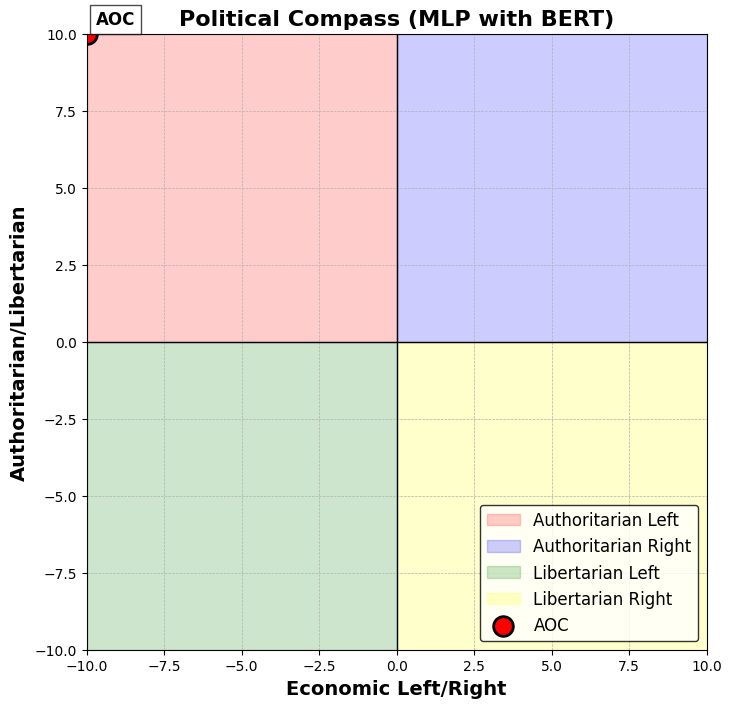

In [ ]:
# Önce tekrar fonksiyonumuzu tanımlayalım
def process_politician_tweets(df, name, x, y):
    """
    Belirli bir politik figürün tweetlerini temizleyip TF-IDF ile vektörleştirir
    ve belirtilen (x,y) koordinatına yerleştirir.
    """
    tweets = df["body"].dropna().tolist()
    cleaned_tweets = [clean_text(tweet) for tweet in tweets]

    # TF-IDF vektörleştirme
    X = vectorizer.fit_transform(cleaned_tweets)

    # Boyut indirgeme (AOC'ın tweetlerini tek bir vektöre indirgemek için)
    X_reduced = svd.fit_transform(X.T)  # Transpoz alıp kelimeler bazında indiriyoruz

    # Standardize edip normalize edelim
    X_normalized = scaler.fit_transform(X_reduced)

    return {"politician": name, "x": x, "y": y, "vector": X_normalized.flatten()}

# AOC'ın tweetlerini tekrar işleyelim ve vektörünü oluşturalım
AOC_vector = process_politician_tweets(df, "AOC", -10, 10)

# 📊 **Grafik Çizme - Politik Compass**
plt.figure(figsize=(8, 8))
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)
plt.fill_between([-10, 0], 0, 10, color="red", alpha=0.2, label="Authoritarian Left")
plt.fill_between([0, 10], 0, 10, color="blue", alpha=0.2, label="Authoritarian Right")
plt.fill_between([-10, 0], -10, 0, color="green", alpha=0.2, label="Libertarian Left")
plt.fill_between([0, 10], -10, 0, color="yellow", alpha=0.2, label="Libertarian Right")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("Economic Left/Right", fontsize=14, fontweight="bold")
plt.ylabel("Authoritarian/Libertarian", fontsize=14, fontweight="bold")
plt.title("Political Compass (MLP with BERT)", fontsize=16, fontweight="bold")

# AOC'ın politik pusula üzerindeki konumunu çizelim
plt.scatter(AOC_vector["x"], AOC_vector["y"], s=200, color="red", edgecolors="black", linewidth=2, label="AOC")
plt.text(AOC_vector["x"] + 0.3, AOC_vector["y"] + 0.3, "AOC", fontsize=12, fontweight="bold", bbox=dict(facecolor="white", alpha=0.7))

plt.legend(loc="lower right", fontsize=12, frameon=True, edgecolor="black")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()
